## Build a Machine Learning model which aims to predict flower's class on it's unique characterstics.

Import essentials

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

Loading data

In [110]:
df=pd.read_csv('Iris.csv')
df.sample(8)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
69,70,5.6,2.5,3.9,1.1,Iris-versicolor
1,2,4.9,3.0,1.4,0.2,Iris-setosa
80,81,5.5,2.4,3.8,1.1,Iris-versicolor
77,78,6.7,3.0,5.0,1.7,Iris-versicolor
71,72,6.1,2.8,4.0,1.3,Iris-versicolor
33,34,5.5,4.2,1.4,0.2,Iris-setosa
25,26,5.0,3.0,1.6,0.2,Iris-setosa
123,124,6.3,2.7,4.9,1.8,Iris-virginica


data exploration

In [3]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

data preprocessing - find and delete duplicate rows

In [8]:
duplicates=df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []


In [10]:
num_duplicates=df.duplicated().sum()
print('number of duplicate rows are:', num_duplicates)

number of duplicate rows are: 0


In [11]:
df.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [12]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
#no duplicate values 
#no missing values
#all set for splitting

X,y,Train,Test split

In [14]:
X=df.iloc[:,1:5]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
y=df.iloc[:,-1]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.3,
                                               random_state=42)

In [18]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [20]:
y_train

81     Iris-versicolor
133     Iris-virginica
137     Iris-virginica
75     Iris-versicolor
109     Iris-virginica
            ...       
71     Iris-versicolor
106     Iris-virginica
14         Iris-setosa
92     Iris-versicolor
102     Iris-virginica
Name: Species, Length: 105, dtype: object

Analyzing variables

In [25]:
df['Species'].nunique() # number of unique species

3

In [24]:
df['Species'].unique() # name of unique species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [26]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Balanced Dataset, Next find outliers and remove them

In [31]:
#we'll use z-score method, apply threshold, compare, detect, remove :)
from sklearn.datasets import load_iris
# Load Iris dataset
iris = load_iris(as_frame=True)
df = iris.frame
df["class"] = iris.target

# Calculate z-scores
number=(df.select_dtypes(include=np.number))
z_score = (number - number.mean()) / number.std()

# Keep only rows where all features have |z| < 3
df_clean = df[(np.abs(z_score) < 3).all(axis=1)]

In [34]:
df.shape

(150, 6)

In [35]:
df_clean.shape

(149, 6)

Text(0.5, 1.0, 'Outliers')

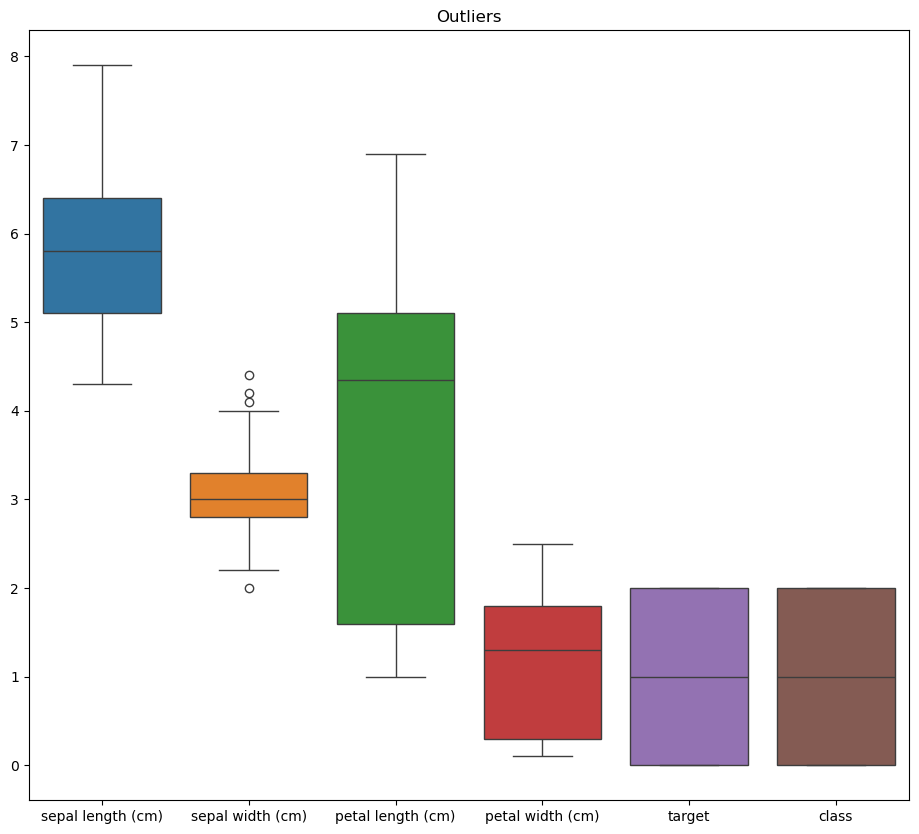

In [50]:
# Visualizing Outliers 
plt.figure(figsize = (25,10))
plt.subplot(1,2,1)
sns.boxplot(df)
plt.title('Outliers')

Detect Distribution

sepal length is quite balanced, the graph messed up, so, wiped it.

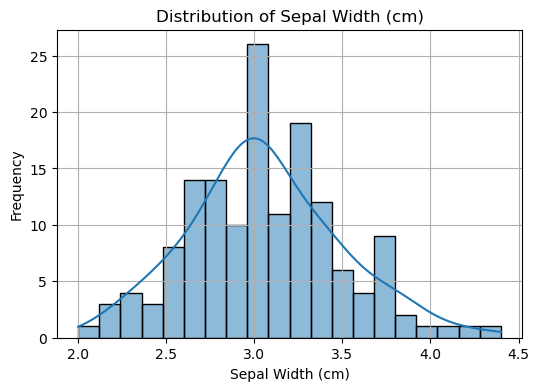

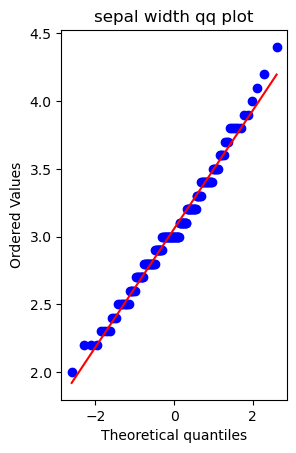

In [65]:
plt.figure(figsize=(6, 4))
sns.histplot(df['sepal width (cm)'], bins=20, kde=True, edgecolor='black')
plt.title('Distribution of Sepal Width (cm)')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.subplot(122)
stats.probplot(df['sepal width (cm)'], dist='norm', plot=plt)
plt.title('sepal width qq plot')

plt.show()

Sepal width is quite better

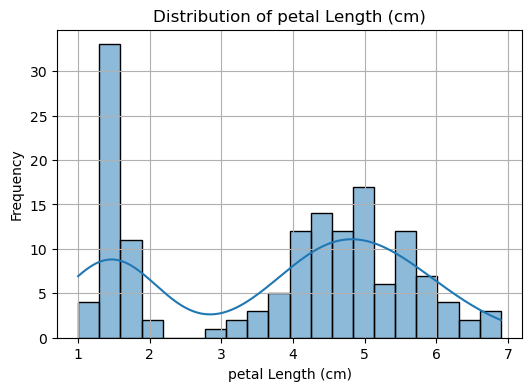

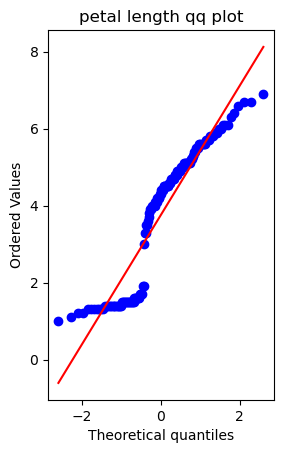

In [66]:
plt.figure(figsize=(6, 4))
sns.histplot(df['petal length (cm)'], bins=20, kde=True, edgecolor='black')
plt.title('Distribution of petal Length (cm)')
plt.xlabel('petal Length (cm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.subplot(122)
stats.probplot(df['petal length (cm)'], dist='norm', plot=plt)
plt.title('petal length qq plot')

plt.show()

Petal length is messy

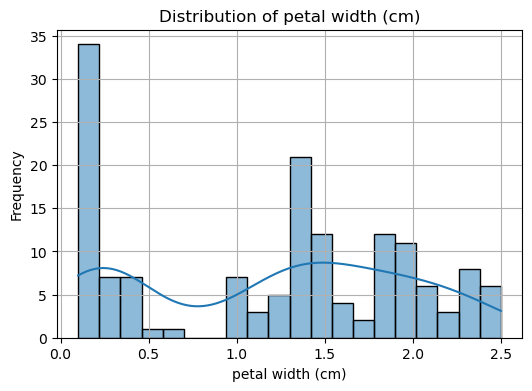

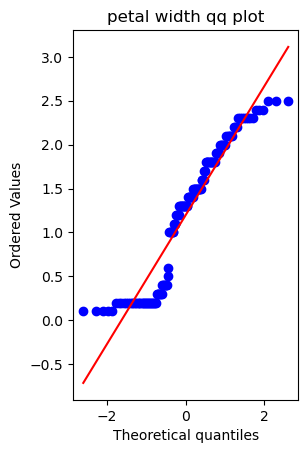

In [68]:
plt.figure(figsize=(6, 4))
sns.histplot(df['petal width (cm)'], bins=20, kde=True, edgecolor='black')
plt.title('Distribution of petal width (cm)')
plt.xlabel('petal width (cm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.subplot(122)
stats.probplot(df['petal width (cm)'], dist='norm', plot=plt)
plt.title('petal width qq plot')

plt.show()

Petal width is also not balanced

Let's scale the values first

In [70]:
df = iris.data

In [73]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)
df_scaled=pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head(8)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
5,-0.537178,1.939791,-1.169714,-1.052180
6,-1.506521,0.788808,-1.340227,-1.183812
7,-1.021849,0.788808,-1.283389,-1.315444


In [74]:
#now if i scan my data 

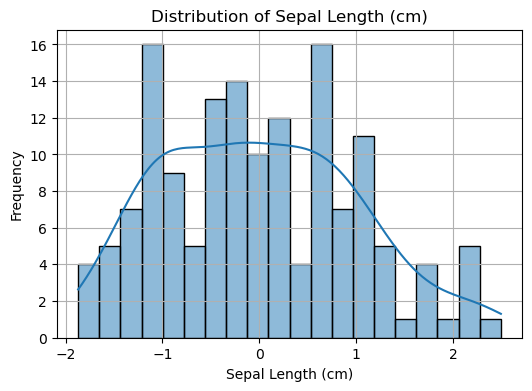

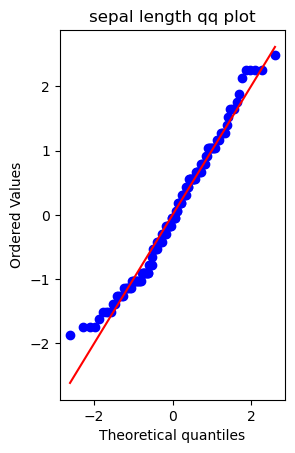

In [76]:
plt.figure(figsize=(6, 4))
sns.histplot(df_scaled['sepal length (cm)'], bins=20, kde=True, edgecolor='black')
plt.title('Distribution of Sepal Length (cm)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

import scipy.stats as stats
plt.subplot(122)
stats.probplot(df_scaled['sepal length (cm)'], dist='norm', plot=plt)
plt.title('sepal length qq plot')

plt.show()

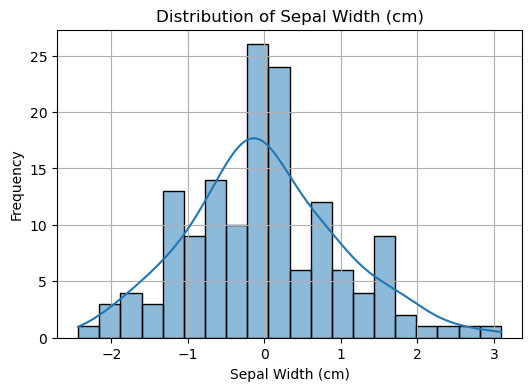

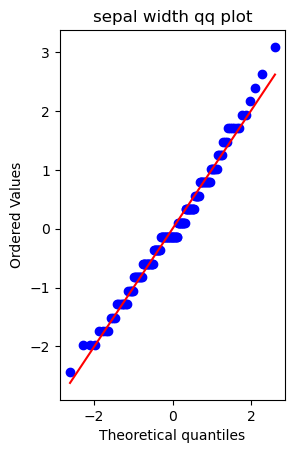

In [77]:
plt.figure(figsize=(6, 4))
sns.histplot(df_scaled['sepal width (cm)'], bins=20, kde=True, edgecolor='black')
plt.title('Distribution of Sepal Width (cm)')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.subplot(122)
stats.probplot(df_scaled['sepal width (cm)'], dist='norm', plot=plt)
plt.title('sepal width qq plot')

plt.show()

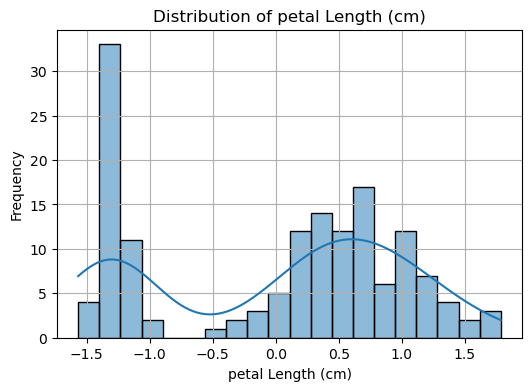

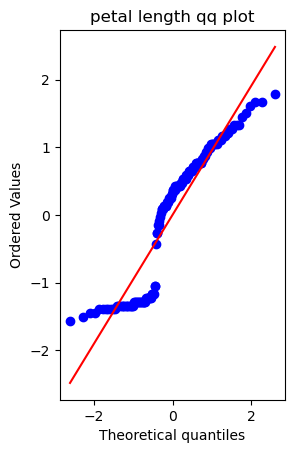

In [78]:
plt.figure(figsize=(6, 4))
sns.histplot(df_scaled['petal length (cm)'], bins=20, kde=True, edgecolor='black')
plt.title('Distribution of petal Length (cm)')
plt.xlabel('petal Length (cm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.subplot(122)
stats.probplot(df_scaled['petal length (cm)'], dist='norm', plot=plt)
plt.title('petal length qq plot')

plt.show()

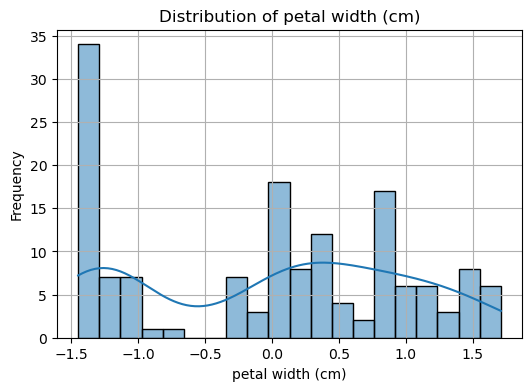

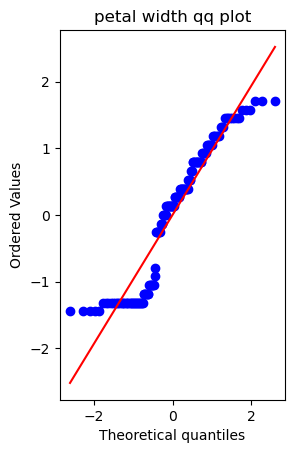

In [79]:
plt.figure(figsize=(6, 4))
sns.histplot(df_scaled['petal width (cm)'], bins=20, kde=True, edgecolor='black')
plt.title('Distribution of petal width (cm)')
plt.xlabel('petal width (cm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.subplot(122)
stats.probplot(df_scaled['petal width (cm)'], dist='norm', plot=plt)
plt.title('petal width qq plot')

plt.show()

In [82]:
#before tranformation
clf = LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
clf2=DecisionTreeClassifier()

clf.fit(X_train, y_train)
clf2.fit(X_train,y_train)

y_pred=clf.predict(X_test)
y_pred1=clf2.predict(X_test)

from sklearn.metrics import accuracy_score

print("Accuracy LogReg",accuracy_score(y_test,y_pred))
print("Accuracy DecTree",accuracy_score(y_test,y_pred1))

Accuracy LogReg 1.0
Accuracy DecTree 1.0


In [86]:
from sklearn.preprocessing import FunctionTransformer

trf=FunctionTransformer(func=np.log1p)

X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.fit_transform(X_test)

#predicting on coluns after log transform
clf = LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed,y_train)

y_pred=clf.predict(X_test_transformed)
y_pred1=clf2.predict(X_test_transformed)

print("Accuracy LogReg",accuracy_score(y_test,y_pred))
print("Accuracy DecTree",accuracy_score(y_test,y_pred1))

Accuracy LogReg 0.9333333333333333
Accuracy DecTree 0.9555555555555556


In [101]:
from sklearn.compose import ColumnTransformer
trf2 = ColumnTransformer(transformers=[(('log',FunctionTransformer(np.log1p),X.columns))]
                         ,remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)


clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2)) 

Accuracy LR 0.9333333333333333
Accuracy DT 0.9555555555555556


same accuracy before and after

### what i have learned

scaling scaled but doing it is totally irrelevant when data is this much pretty

non-normal feature distributions do not necessarily hurt model performance, especially on structured datasets like Iris.

Logistic Regression Tolerates Non-Normality

Trees split data based on thresholds, not statistical assumptions.

Scaling Doesn’t Fix Skewness

encoding ordinal categorical dataset for output using label encoder

In [121]:
label_encoder = LabelEncoder()
# Our target column class has 3 species of flower named Iris-setosa,Iris-versicolor,Iris-virginica
# We are using label encoder to convert this categorical value into numerical
# 0 means Iris-setosa, 1 means Iris-versicolor and 2 means Iris-virginica

df['Species'] = label_encoder.fit_transform(df['Species'])
df['Species'].sample(8)


97     1
117    2
111    2
0      0
93     1
77     1
81     1
47     0
Name: Species, dtype: int64

In [122]:
X = df.drop('Species', axis=1)
y = df['Species']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [125]:
X.head(8)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
5,6,5.4,3.9,1.7,0.4
6,7,4.6,3.4,1.4,0.3
7,8,5.0,3.4,1.5,0.2


In [126]:
y.head

<bound method NDFrame.head of 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64>

In [127]:
print(X.shape)
print(y.shape)

(150, 5)
(150,)


In [129]:
X_train.shape


(105, 5)

In [130]:
 X_test.shape

(45, 5)

In [131]:
 y_train.shape

(105,)

In [132]:
 y_test.shape

(45,)

hyperparameter tuning - finding best parameters
model building

In [133]:
logistic_model = LogisticRegression()

parameters = {'penalty':('l1','l2','elasticnet',None),'C':[1,10,20],
             'solver':('lbfgs','liblinear')}

model = GridSearchCV(logistic_model,param_grid=parameters,cv=5)

model.fit(X_train,y_train) #Splitting of train data into train & Validation data

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 20],
                         'penalty': ('l1', 'l2', 'elasticnet', None),
                         'solver': ('lbfgs', 'liblinear')})

In [135]:
model.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [136]:
logistic_model = LogisticRegression(C= 1, penalty = 'l2', solver = 'lbfgs')

In [137]:
logistic_model.fit(X_train,y_train)

LogisticRegression(C=1)

In [138]:
y_pred = logistic_model.predict(X_test)

In [139]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [140]:
print(accuracy_score(y_pred,y_test))

1.0


: ) why i feel like surgery successfully completed. but.... on a doll 